In [1]:
%pip install spacy

!python -m spacy download fr_core_news_sm



Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
     --------------------------------------- 0.0/16.3 MB 330.3 kB/s eta 0:00:50
     ---------------------------------------- 0.1/16.3 MB 1.1 MB/s eta 0:00:16
     - -------------------------------------- 0.7/16.3 MB 4.2 MB/s eta 0:00:04
     --- ------------------------------------ 1.3/16.3 MB 6.0 MB/s eta 0:00:03
     ----- ---------------------------------- 2.1/16.3 MB 7.9 MB/s eta 0:00:02
     ------- -------------------------------- 3.0/16.3 MB 9.5 MB/s eta 0:00:02
     --------- ------------------------------ 4.0/16.3 MB 11.2 MB/s eta 0:00:02
     ------------ --------------------------- 5.2/16.3 MB 12.9 MB/s eta 0:00:01
     ---------------- ----------------------- 6.7/16.3 MB 14.8 MB/s eta 0:00:01
     -------------------- ------------------- 8.3/16.3 MB 16.5 MB/s eta 0:0

In [8]:
%pip install imbalanced-learn

%pip install --upgrade scikit-learn

%pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 960.0 kB/s eta 0:00:12
    --------------------------------------- 0.2/10.6 MB 3.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/10.6 MB 11.6 MB/s eta 0:00:01
   ------------------- -------------------- 5.1/10.6 MB 29.5 MB/s eta 0:00:01
   ---------------------------------- ----- 9.2/10.6 MB 41.8 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 54.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstal

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\Admin\\anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/257.7 kB 660.6 kB/s eta 0:00:01
   ------------------------------ --------- 194.6/257.7 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 257.7/257.7 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


Les imports

In [121]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import spacy
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns


Creation des dataframe pour entrainement , dev et test  

In [3]:
df_test = pd.read_csv("../data/test/test.csv")
df_train = pd.read_csv("../data/train/train.csv")
dff = pd.read_csv("../data/test.csv")

Vérification d'un déséquilibre de classes parmi les types de recettes.

In [18]:
dff.head()
dff['type'].value_counts()

type
Plat principal    644
Dessert           407
Entrée            337
Name: count, dtype: int64

In [5]:
df_train.head()

num_rows = len(df_train)
print("Number of rows:", num_rows)

df_train['type'].value_counts()

Number of rows: 9977


type
Plat principal    4641
Dessert           3009
Entrée            2327
Name: count, dtype: int64

In [6]:
df_test.head()

num_rows = len(df_test)
print("Number of rows:", num_rows)

df_test['type'].value_counts()

Number of rows: 2496


type
Plat principal    1161
Dessert            753
Entrée             582
Name: count, dtype: int64

Nous pouvons constater qu'il existe une très grande quantité de plats principaux par rapport aux entrées dans le dataset. Cela risque de donner des prédictions biaisées car les classifieurs pourraient se concentrer sur la classe majoritaire et accorder peu d'importance aux autres classes.

Division des datasets en X_train, X_test, Y_train, Y_test. 

In [5]:
X_train = df_train['recette']
X_test = df_test['recette']

Y_train = df_train['type']
Y_test = df_test['type']

dff_X = dff["recette"]
dff_Y = dff["type"]

TFI-DF + Random Forest sur les donne d'entrainement et de test

In [118]:
#1. Créer un objet pipeline
clf = Pipeline([
     ('vectorizer_tfidf', TfidfVectorizer()),        
     ('Random Forest', RandomForestClassifier())         
])

#2. Adapter avec X_train et y_train
clf.fit(X_train, Y_train)

#3. Obtenir les prédictions pour X_test et les stocker dans y_pred
Y_pred = clf.predict(X_test)

#4. Imprimer le rapport de classification
print(classification_report(Y_test, Y_pred))



                precision    recall  f1-score   support

       Dessert       0.96      0.99      0.98       753
        Entrée       0.85      0.33      0.47       582
Plat principal       0.75      0.96      0.84      1161

      accuracy                           0.82      2496
     macro avg       0.85      0.76      0.76      2496
  weighted avg       0.84      0.82      0.80      2496



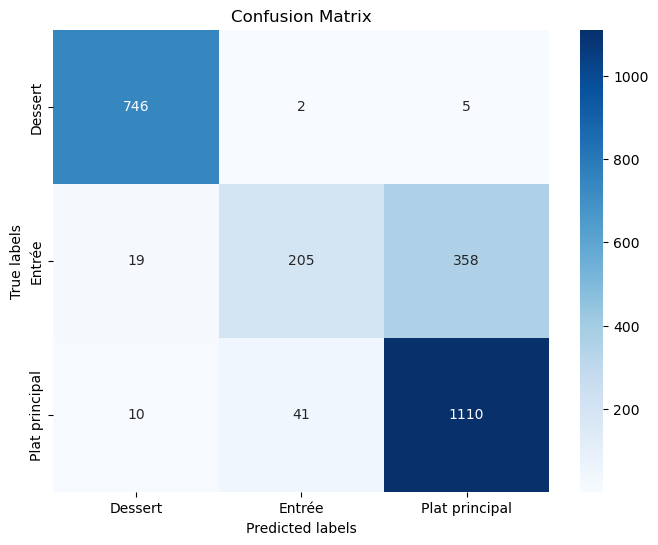

In [78]:
cm = confusion_matrix(Y_test, Y_pred)

# 6. Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [79]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),       
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, Y_train)


#3. get the predictions for X_test and store it in y_pred
Y_pred = clf.predict(dff_X)


#4. print the classfication report
print(classification_report(dff_Y, Y_pred))

                precision    recall  f1-score   support

       Dessert       0.94      0.99      0.96       407
        Entrée       0.85      0.35      0.50       337
Plat principal       0.75      0.95      0.84       644

      accuracy                           0.82      1388
     macro avg       0.85      0.76      0.77      1388
  weighted avg       0.83      0.82      0.79      1388



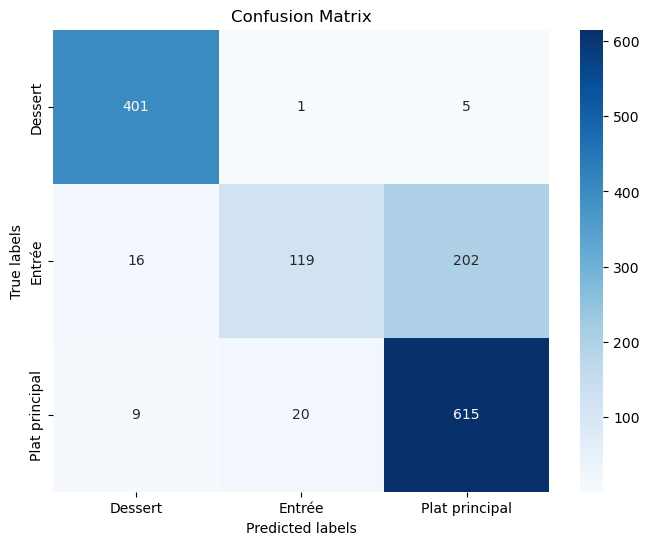

In [81]:
# Step 8: Print the confusion matrix
conf_matrix = confusion_matrix(dff_Y, Y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

test smote sur train +dev


In [85]:
# Step 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['recette'])

# Step 2: Instantiate SMOTE
smote = SMOTE(random_state=42)

# Step 3: Apply SMOTE to your training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_tfidf, df_train['type'])

# Step 4: Create a pipeline object
clf = Pipeline([
    ('Random Forest', RandomForestClassifier())
])

# Step 5: Fit the pipeline with resampled X_train and Y_train
clf.fit(X_train_resampled, Y_train_resampled)

# Step 6: Transform the test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(df_test['recette'])

# Step 7: Get the predictions for X_test and store it in Y_pred
Y_pred = clf.predict(X_test_tfidf)

# Step 8: Print the classification report
print(classification_report(df_test['type'], Y_pred))

                precision    recall  f1-score   support

       Dessert       0.96      0.99      0.97       753
        Entrée       0.69      0.53      0.60       582
Plat principal       0.79      0.88      0.83      1161

      accuracy                           0.83      2496
     macro avg       0.82      0.80      0.80      2496
  weighted avg       0.82      0.83      0.82      2496



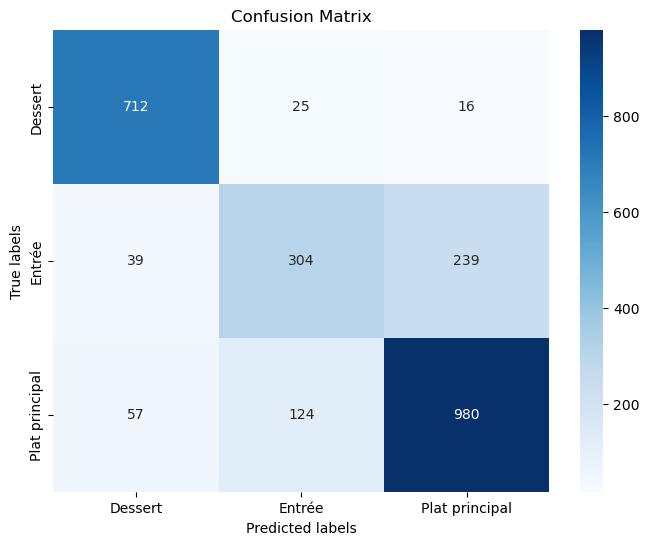

In [115]:
# Step 8: Print the confusion matrix
conf_matrix = confusion_matrix(df_test['type'], Y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

test smote sur dff

In [86]:
# Step 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['recette'])

# Step 2: Instantiate SMOTE
smote = SMOTE(random_state=42)

# Step 3: Apply SMOTE to your training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_tfidf, df_train['type'])

# Step 4: Create a pipeline object
clf = Pipeline([
    ('Random Forest', RandomForestClassifier())
])

# Step 5: Fit the pipeline with resampled X_train and Y_train
clf.fit(X_train_resampled, Y_train_resampled)

# Step 6: Transform the test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(dff_X)

# Step 7: Get the predictions for X_test and store it in Y_pred
Y_pred = clf.predict(X_test_tfidf)

# Step 8: Print the classification report
print(classification_report(dff_Y, Y_pred))

                precision    recall  f1-score   support

       Dessert       0.94      0.99      0.96       407
        Entrée       0.76      0.59      0.67       337
Plat principal       0.82      0.89      0.85       644

      accuracy                           0.85      1388
     macro avg       0.84      0.82      0.83      1388
  weighted avg       0.84      0.85      0.84      1388



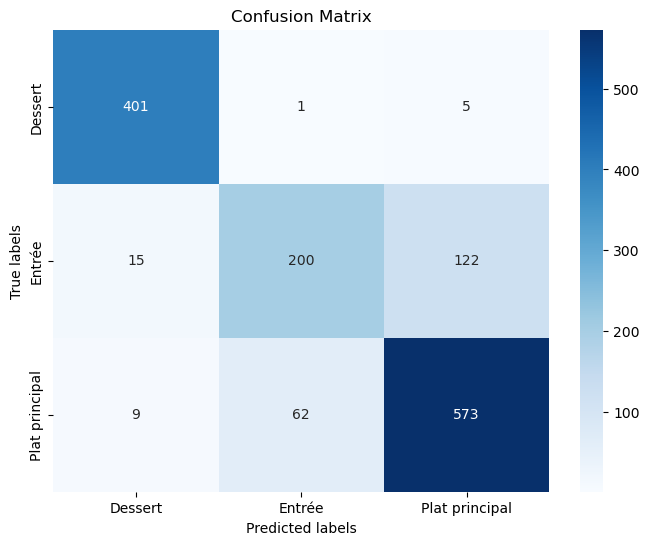

In [88]:
# Step 8: Print the confusion matrix
conf_matrix = confusion_matrix(dff_Y, Y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

TFI-DF + KNN

In [113]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, Y_train)


#3. get the predictions for X_test and store it in y_pred
Y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(Y_test, Y_pred))



                precision    recall  f1-score   support

       Dessert       0.88      0.95      0.91       753
        Entrée       0.67      0.52      0.59       582
Plat principal       0.79      0.84      0.82      1161

      accuracy                           0.80      2496
     macro avg       0.78      0.77      0.77      2496
  weighted avg       0.79      0.80      0.79      2496



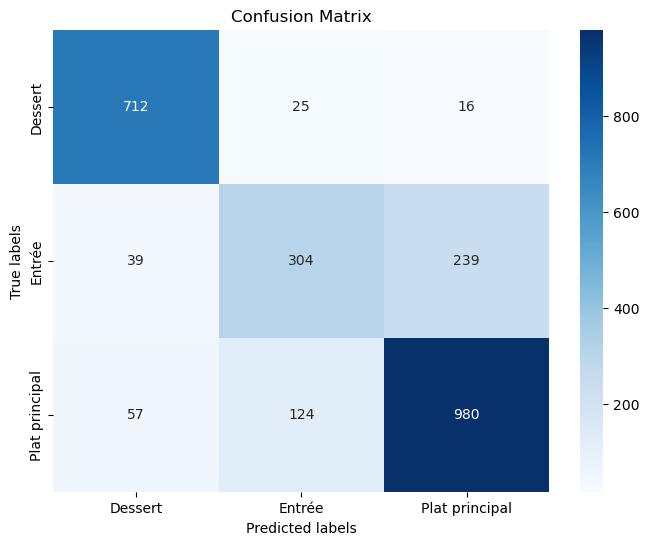

In [114]:
# Step 8: Print the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [92]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),       
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, Y_train)


#3. get the predictions for X_test and store it in y_pred
Y_pred = clf.predict(dff_X)


#4. print the classfication report
print(classification_report(dff_Y, Y_pred))

                precision    recall  f1-score   support

       Dessert       0.87      0.97      0.92       407
        Entrée       0.69      0.54      0.61       337
Plat principal       0.81      0.84      0.82       644

      accuracy                           0.81      1388
     macro avg       0.79      0.78      0.78      1388
  weighted avg       0.80      0.81      0.80      1388



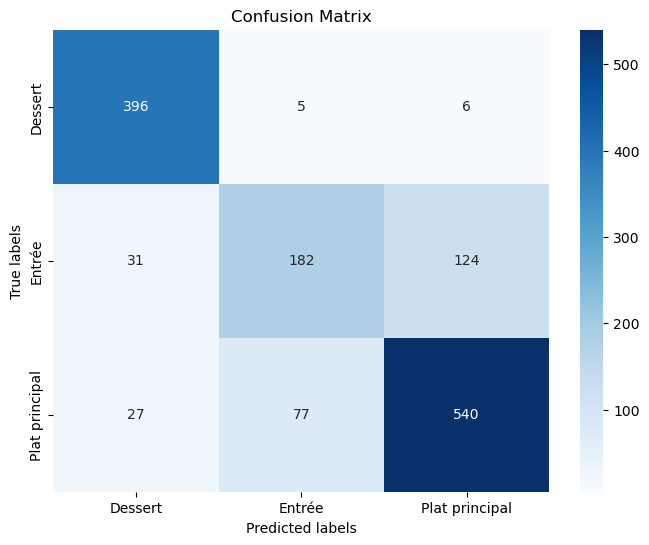

In [93]:
# Step 8: Print the confusion matrix
conf_matrix = confusion_matrix(dff_Y, Y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [101]:
# Step 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['recette'])

# Step 2: Instantiate SMOTE
smote = SMOTE(random_state=42)

# Step 3: Apply SMOTE to your training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_tfidf, df_train['type'])

# Step 4: Create a pipeline object
clf = Pipeline([
    ('KNN', KNeighborsClassifier())
])

# Step 5: Fit the pipeline with resampled X_train and Y_train
clf.fit(X_train_resampled, Y_train_resampled)

# Step 6: Transform the test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(df_test['recette'])

# Step 7: Get the predictions for X_test and store it in Y_pred
Y_pred = clf.predict(X_test_tfidf)

# Step 8: Print the classification report
print(classification_report(df_test['type'], Y_pred))

                precision    recall  f1-score   support

       Dessert       0.85      0.92      0.88       753
        Entrée       0.33      0.93      0.49       582
Plat principal       0.95      0.05      0.10      1161

      accuracy                           0.52      2496
     macro avg       0.71      0.63      0.49      2496
  weighted avg       0.78      0.52      0.43      2496



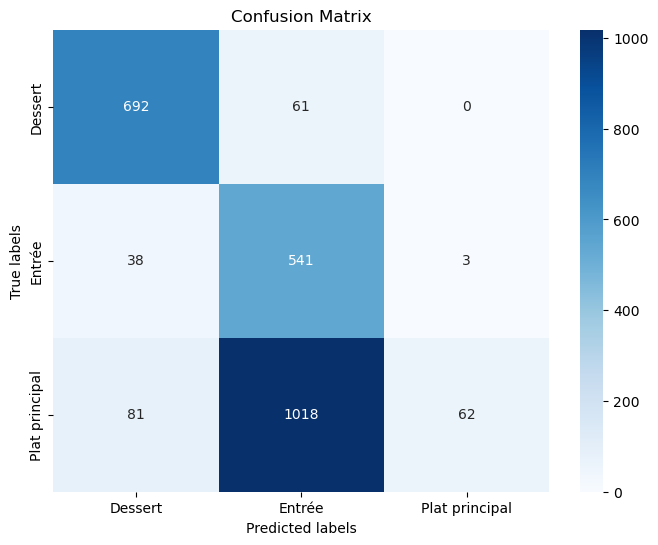

In [102]:
# Step 8: Print the confusion matrix
conf_matrix = confusion_matrix(df_test['type'], Y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [97]:
# Step 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['recette'])

# Step 2: Instantiate SMOTE
smote = SMOTE(random_state=42)

# Step 3: Apply SMOTE to your training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_tfidf, df_train['type'])

# Step 4: Create a pipeline object
clf = Pipeline([
    ( 'KNN', KNeighborsClassifier())
])

# Step 5: Fit the pipeline with resampled X_train and Y_train
clf.fit(X_train_resampled, Y_train_resampled)

# Step 6: Transform the test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(dff_X)

# Step 7: Get the predictions for X_test and store it in Y_pred
Y_pred = clf.predict(X_test_tfidf)

# Step 8: Print the classification report
print(classification_report(dff_Y, Y_pred))

                precision    recall  f1-score   support

       Dessert       0.86      0.94      0.90       407
        Entrée       0.35      0.95      0.51       337
Plat principal       0.97      0.05      0.09       644

      accuracy                           0.53      1388
     macro avg       0.73      0.64      0.50      1388
  weighted avg       0.79      0.53      0.43      1388



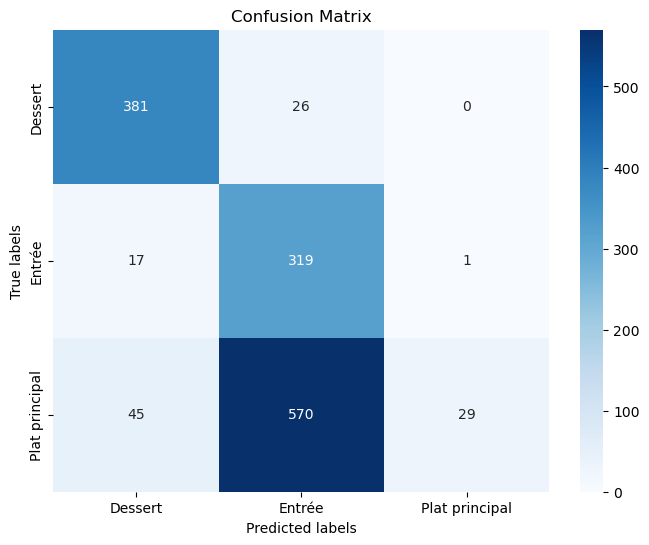

In [98]:
# Step 8: Print the confusion matrix
conf_matrix = confusion_matrix(dff_Y, Y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Normalisation des recette

In [8]:
# Load French language model and create nlp object from it
nlp = spacy.load("fr_core_news_sm")

def preprocess(text):
    # Remove stop words, convert to lowercase, and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        # Customize filtering conditions for French text
        if token.is_stop or token.is_punct:
            continue
        # Convert token to lowercase and append to filtered_tokens
        filtered_tokens.append(token.lemma_.lower())
    
    return " ".join(filtered_tokens)

In [9]:
df_train['preprocessed_txt'] = df_train['recette'].apply(preprocess)
df_test['preprocessed_txt'] = df_test['recette'].apply(preprocess)
dff['preprocessed_txt'] = dff['recette'].apply(preprocess)


In [9]:
df_train.head()

,doc_id,titre,type,difficulte,cout,ingredients,recette,preprocessed_txt
0,recette_19924.xml,Bûche de Noël pistachée,Dessert,Moyennement difficile,Moyen,- Pour le biscuit : - 4 œufs + 2 jaunes - 110 ...,Préchauffez le four à (210°C). Étalez du papie...,préchauffez four 210 degré c étaler papier sul...
1,recette_25149.xml,Tarte aux pommes au fromage blanc,Dessert,Facile,Moyen,- 1 rouleau de pâte feuilletée ou brisée - 3 p...,"Pelez et coupez les pommes en quartiers, retir...",peler couper pomme quartier retirer pépin fait...
2,recette_40068.xml,Salade de chèvre chaud au miel et pesto,Entrée,Très facile,Bon marché,- 4 chèvres frais - 4 poignées de roquette (ou...,Faire une couronne avec la roquette dans chaqu...,faire couronne roquette assiette déposer tomat...
3,recette_62942.xml,Pommes de terre farcies aux escargots,Entrée,Très facile,Moyen,- 2 très grosses pommes de terre - 4 douzaines...,Faire cuire les pommes de terre à l'eau mais p...,faire cuire pomme terre eau complètement 15 20...
4,recette_12714.xml,Tarte au fromage et à l'abricot,Dessert,Facile,Bon marché,- Pour la pâte : - 200 g de farine - 1 oeuf - ...,Coupez en petit dés le beurre que vous mélange...,couper petit der beurre mélanger sucre oeuf fa...


In [10]:
X_train = df_train['preprocessed_txt']
X_test = df_test['preprocessed_txt']
dff_X = dff['preprocessed_txt']

Y_train = df_train['type']
Y_test = df_test['type']
dff_Y = dff['type']

TF-IDF + KNN

In [105]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, Y_train)


#3. get the predictions for X_test and store it in y_pred
Y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(Y_test, Y_pred))

                precision    recall  f1-score   support

       Dessert       0.88      0.95      0.91       753
        Entrée       0.67      0.52      0.59       582
Plat principal       0.79      0.84      0.82      1161

      accuracy                           0.80      2496
     macro avg       0.78      0.77      0.77      2496
  weighted avg       0.79      0.80      0.79      2496



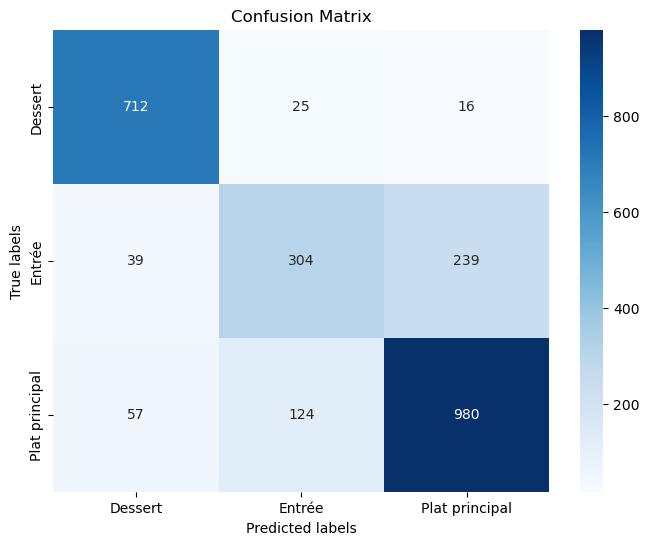

In [106]:
# Step 8: Print the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [107]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),       
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, Y_train)


#3. get the predictions for X_test and store it in y_pred
Y_pred = clf.predict(dff_X)


#4. print the classfication report
print(classification_report(dff_Y, Y_pred))

                precision    recall  f1-score   support

       Dessert       0.87      0.97      0.92       407
        Entrée       0.69      0.54      0.61       337
Plat principal       0.81      0.84      0.82       644

      accuracy                           0.81      1388
     macro avg       0.79      0.78      0.78      1388
  weighted avg       0.80      0.81      0.80      1388



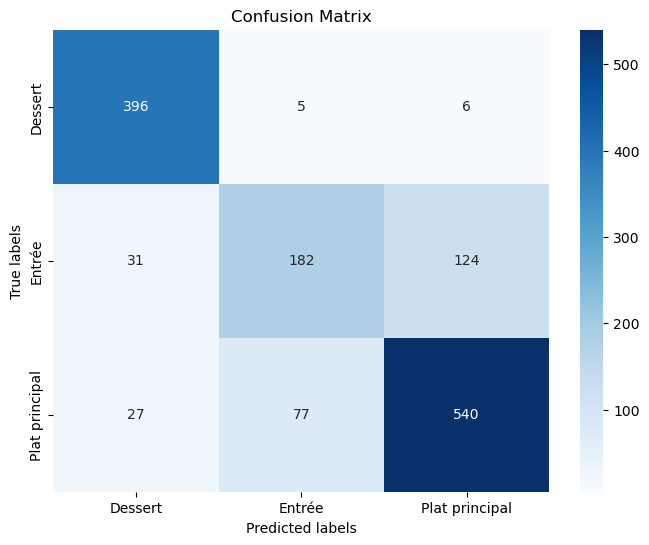

In [108]:
# Step 8: Print the confusion matrix
conf_matrix = confusion_matrix(dff_Y, Y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [109]:
# Step 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['recette'])

# Step 2: Instantiate SMOTE
smote = SMOTE(random_state=42)

# Step 3: Apply SMOTE to your training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_tfidf, df_train['type'])

# Step 4: Create a pipeline object
clf = Pipeline([
    ('KNN', KNeighborsClassifier())
])

# Step 5: Fit the pipeline with resampled X_train and Y_train
clf.fit(X_train_resampled, Y_train_resampled)

# Step 6: Transform the test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(df_test['recette'])

# Step 7: Get the predictions for X_test and store it in Y_pred
Y_pred = clf.predict(X_test_tfidf)

# Step 8: Print the classification report
print(classification_report(df_test['type'], Y_pred))

                precision    recall  f1-score   support

       Dessert       0.85      0.92      0.88       753
        Entrée       0.33      0.93      0.49       582
Plat principal       0.95      0.05      0.10      1161

      accuracy                           0.52      2496
     macro avg       0.71      0.63      0.49      2496
  weighted avg       0.78      0.52      0.43      2496



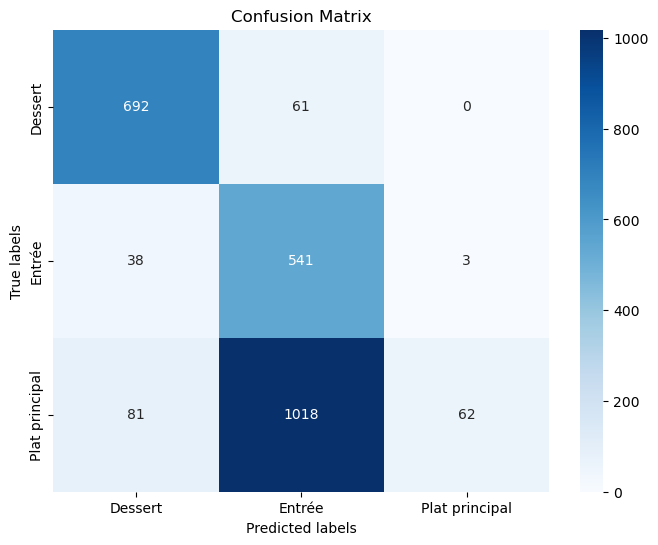

In [110]:
# Step 8: Print the confusion matrix
conf_matrix = confusion_matrix(df_test['type'], Y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [111]:
# Step 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['recette'])

# Step 2: Instantiate SMOTE
smote = SMOTE(random_state=42)

# Step 3: Apply SMOTE to your training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_tfidf, df_train['type'])

# Step 4: Create a pipeline object
clf = Pipeline([
    ( 'KNN', KNeighborsClassifier())
])

# Step 5: Fit the pipeline with resampled X_train and Y_train
clf.fit(X_train_resampled, Y_train_resampled)

# Step 6: Transform the test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(dff_X)

# Step 7: Get the predictions for X_test and store it in Y_pred
Y_pred = clf.predict(X_test_tfidf)

# Step 8: Print the classification report
print(classification_report(dff_Y, Y_pred))

                precision    recall  f1-score   support

       Dessert       0.86      0.94      0.90       407
        Entrée       0.35      0.95      0.51       337
Plat principal       0.97      0.05      0.09       644

      accuracy                           0.53      1388
     macro avg       0.73      0.64      0.50      1388
  weighted avg       0.79      0.53      0.43      1388



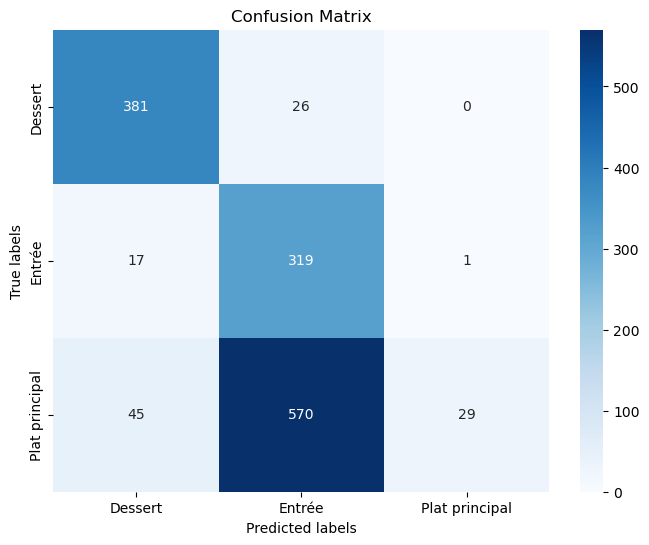

In [112]:
# Step 8: Print the confusion matrix
conf_matrix = confusion_matrix(dff_Y, Y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

TF-IDF + Random Forest

In [28]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),       
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, Y_train)


#3. get the predictions for X_test and store it in y_pred
Y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(Y_test, Y_pred))

                precision    recall  f1-score   support

       Dessert       0.96      0.99      0.97       753
        Entrée       0.82      0.31      0.45       582
Plat principal       0.74      0.96      0.84      1161

      accuracy                           0.82      2496
     macro avg       0.84      0.75      0.75      2496
  weighted avg       0.83      0.82      0.79      2496



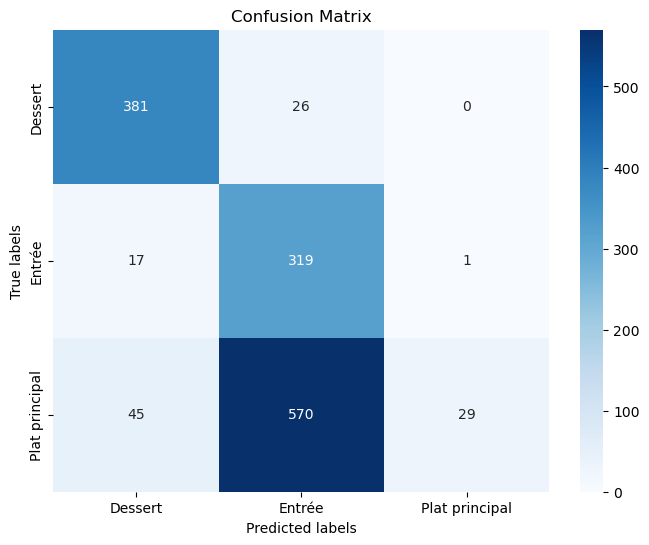

In [57]:
# Step 8: Print the confusion matrix
conf_matrix = confusion_matrix(dff_Y, Y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [39]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),       
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, Y_train)


#3. get the predictions for X_test and store it in y_pred
Y_pred = clf.predict(dff_X)


#4. print the classfication report
print(classification_report(dff_Y, Y_pred))

                precision    recall  f1-score   support

       Dessert       0.96      0.99      0.97       407
        Entrée       0.84      0.38      0.53       337
Plat principal       0.76      0.95      0.84       644

      accuracy                           0.83      1388
     macro avg       0.85      0.78      0.78      1388
  weighted avg       0.84      0.83      0.81      1388



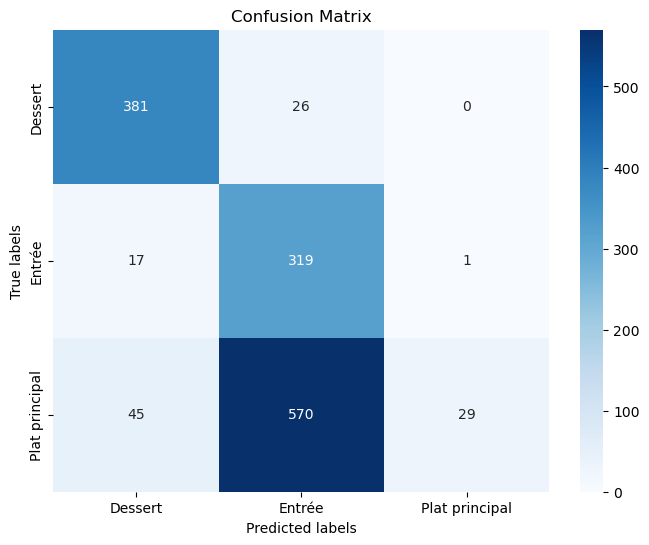

In [56]:
# Step 8: Print the confusion matrix
conf_matrix = confusion_matrix(dff_Y, Y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Step 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['recette'])

# Step 2: Instantiate SMOTE
smote = SMOTE(random_state=42)

# Step 3: Apply SMOTE to your training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_tfidf, df_train['type'])

# Step 4: Create a pipeline object
clf = Pipeline([
    ('Random Forest', RandomForestClassifier())
])

# Step 5: Fit the pipeline with resampled X_train and Y_train
clf.fit(X_train_resampled, Y_train_resampled)

# Step 6: Transform the test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(df_test['recette'])

# Step 7: Get the predictions for X_test and store it in Y_pred
Y_pred = clf.predict(X_test_tfidf)

# Step 8: Print the classification report
print(classification_report(df_test['type'], Y_pred))

                precision    recall  f1-score   support

       Dessert       0.95      0.99      0.97       753
        Entrée       0.71      0.52      0.60       582
Plat principal       0.80      0.89      0.84      1161

      accuracy                           0.83      2496
     macro avg       0.82      0.80      0.80      2496
  weighted avg       0.82      0.83      0.82      2496



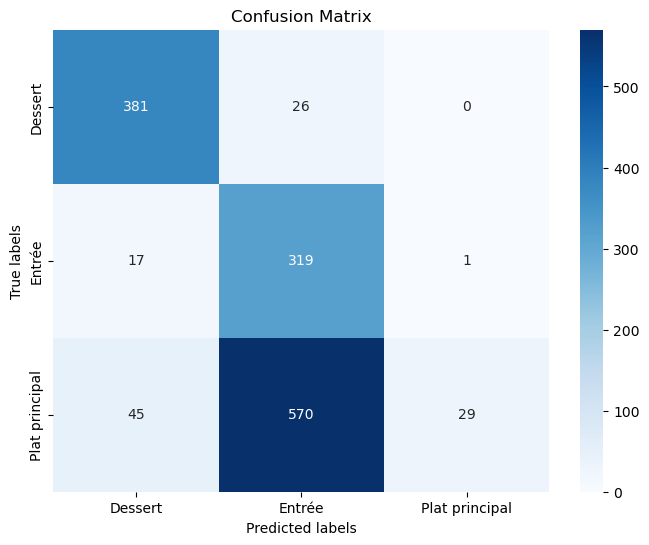

In [55]:
# Step 8: Print the confusion matrix
conf_matrix = confusion_matrix(dff_Y, Y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Step 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['recette'])

# Step 2: Instantiate SMOTE
smote = SMOTE(random_state=42)

# Step 3: Apply SMOTE to your training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_tfidf, df_train['type'])

# Step 4: Create a pipeline object
clf = Pipeline([
    ('Random Forest', RandomForestClassifier())
])

# Step 5: Fit the pipeline with resampled X_train and Y_train
clf.fit(X_train_resampled, Y_train_resampled)

# Step 6: Transform the test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(dff_X)

# Step 7: Get the predictions for X_test and store it in Y_pred
Y_pred = clf.predict(X_test_tfidf)

# Step 8: Print the classification report
print(classification_report(dff_Y, Y_pred))

                precision    recall  f1-score   support

       Dessert       0.93      0.99      0.96       407
        Entrée       0.69      0.60      0.64       337
Plat principal       0.82      0.84      0.83       644

      accuracy                           0.83      1388
     macro avg       0.81      0.81      0.81      1388
  weighted avg       0.82      0.83      0.82      1388



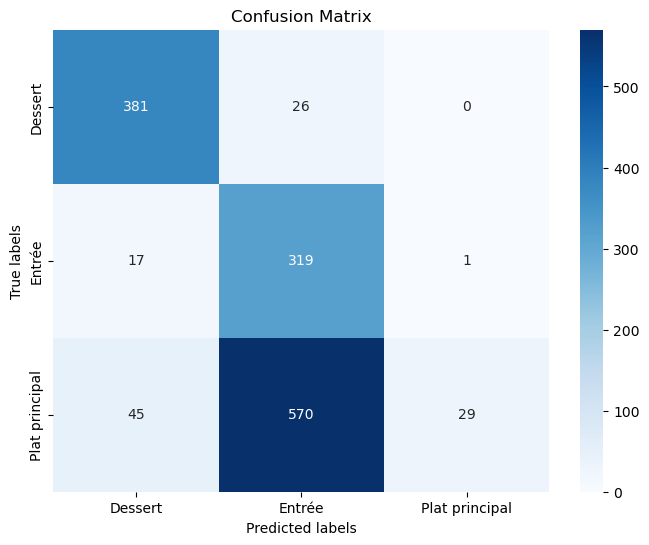

In [54]:
# Step 8: Print the confusion matrix
conf_matrix = confusion_matrix(dff_Y, Y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

